In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
np.array([0.5872788, 0.5724534, 0.5805835, 0.5839311, 0.5891918, 0.5762793, 0.6049737, 0.5767575, 0.5906265, 0.5777140])

array([0.5872788, 0.5724534, 0.5805835, 0.5839311, 0.5891918, 0.5762793,
       0.6049737, 0.5767575, 0.5906265, 0.577714 ])

In [54]:
data = {
    10:    [0.5872788, 0.5724534, 0.5805835, 0.5839311, 0.5891918, 0.5762793, 0.6049737, 0.5767575, 0.5906265, 0.5777140], 
    100:   [0.6245815, 0.6279292, 0.6174079, 0.6164515, 0.6384505, 0.6408417, 0.6164515, 0.6298422, 0.6087996, 0.6097561],
    1000:  [0.6255380, 0.6379723, 0.6417982, 0.6379723, 0.6279292, 0.6269727, 0.6537542, 0.6341463, 0.6461023, 0.6389287], 
    2000: [0.6322334, 0.6494500, 0.6298422, 0.6489718, 0.6508847], 
    4000: [0.6355811, 0.6398852, 0.6499283, 0.6331899, 0.6293639],
    10000: [0.6303204]
}

imputation_number = data.keys()

In [55]:
quartiles = np.zeros((len(data.keys()), 5))
means = np.zeros(len(data.keys()))
standard_errors = np.zeros(len(data.keys()))
for i, key in enumerate(data.keys()):
    quartiles[i, :] = np.quantile(data[key], [0, 0.25, 0.5, 0.75, 1])
    means[i] = np.mean(data[key])
    if len(data[key]) > 1:
        standard_errors[i] = np.std(data[key], ddof=1) / np.sqrt(len(data[key]))
    else: 
        standard_errors[i] = 0

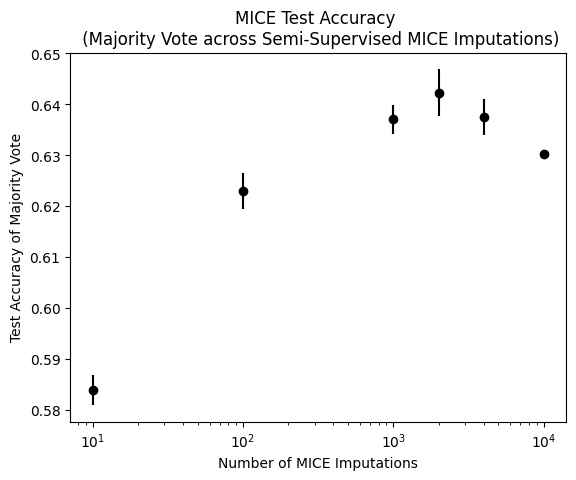

In [60]:
plt.plot(data.keys(), means, 'o', color='black')
plt.errorbar(data.keys(), means, yerr=standard_errors, fmt='none', ecolor='black')
#set x axis to log scale
plt.xscale('log')
plt.ylabel('Test Accuracy of Majority Vote')
plt.xlabel('Number of MICE Imputations')
plt.title('MICE Test Accuracy \n (Majority Vote across Semi-Supervised MICE Imputations)')
plt.savefig('mice-accuracy.png')

# plt.errorbar(data.keys(), quartiles[:, 2], yerr=[quartiles[:, 2] - quartiles[:, 1], quartiles[:, 3] - quartiles[:, 2]], fmt='none', ecolor='black')

<ErrorbarContainer object of 3 artists>

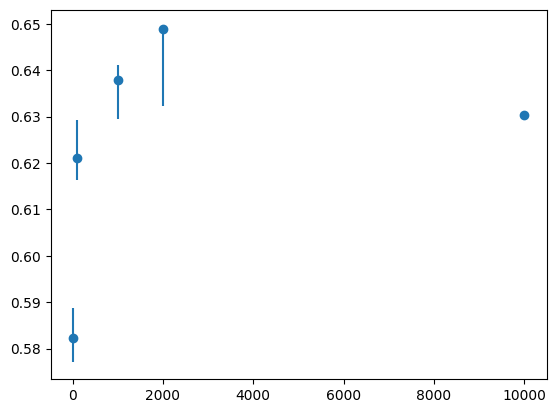

In [43]:
plt.plot(data.keys(), quartiles[:, 2], 'o')
plt.errorbar(data.keys(), quartiles[:, 2], yerr=[quartiles[:, 2] - quartiles[:, 1], quartiles[:, 3] - quartiles[:, 2]], fmt='none')

In [63]:
### all features version

data = { 
    11:    [0.6896222, 0.7111430, 0.7049259, 0.7006217, 0.6819703],
    100:   [0.7111430, 0.7092300, 0.7073171, 0.7178384, 0.7250120],
    501:   [0.7183166, 0.7125777, 0.7259684, 0.7159254, 0.7360115]
}

imputation_number = data.keys()

quartiles = np.zeros((len(data.keys()), 5))
means = np.zeros(len(data.keys()))
standard_errors = np.zeros(len(data.keys()))
for i, key in enumerate(data.keys()):
    quartiles[i, :] = np.quantile(data[key], [0, 0.25, 0.5, 0.75, 1])
    means[i] = np.mean(data[key])
    if len(data[key]) > 1:
        standard_errors[i] = np.std(data[key], ddof=1) / np.sqrt(len(data[key]))
    else: 
        standard_errors[i] = 0

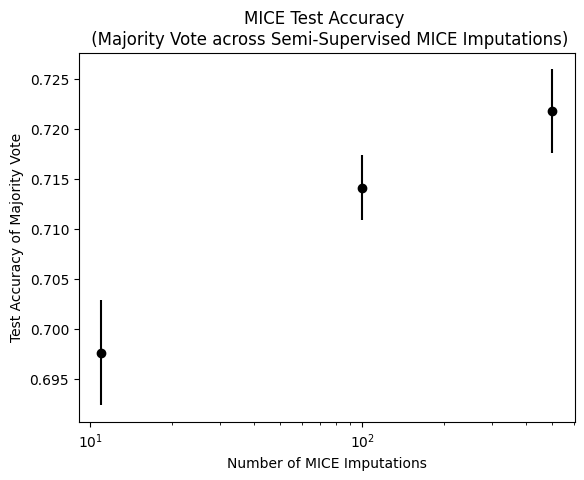

In [64]:
plt.plot(data.keys(), means, 'o', color='black')
plt.errorbar(data.keys(), means, yerr=standard_errors, fmt='none', ecolor='black')
#set x axis to log scale
plt.xscale('log')
plt.ylabel('Test Accuracy of Majority Vote')
plt.xlabel('Number of MICE Imputations')
plt.title('MICE Test Accuracy \n (Majority Vote across Semi-Supervised MICE Imputations)')
plt.savefig('mice-accuracy-all-features.png')